In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

In [2]:
xy = np.loadtxt('data-02-stock_daily.csv', delimiter = ',')

In [3]:
# very important. It does not work without it.
scaler = MinMaxScaler(feature_range = (0, 1))
xy = scaler.fit_transform(xy)

In [4]:
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# before deletion
print(x_data[0], y_data[0])
print(x_data[1], y_data[1])

[0.97333581 0.97543152 1.         0.11112306] [0.98831302]
[0.95690035 0.95988111 0.9803545  0.14250246] [0.97785024]


In [5]:
# predict tomorrow
x_data = np.delete(x_data, -1, 0)
y_data = np.delete(y_data, 0)

print('== Predict tomorrow')
print(x_data[0], '->', y_data[0])

== Predict tomorrow
[0.97333581 0.97543152 1.         0.11112306] -> 0.9778502390712853


In [6]:
model = Sequential()
model.add(Dense(input_dim = 4, units = 1))

In [7]:
model.compile(loss = 'mse', optimizer = 'sgd', metrics = ['mse'])
model.fit(x_data, y_data, epochs = 100)

Epoch 1/100
23/23 [==============================] - 1s 2ms/step - loss: 0.4225 - mse: 0.4225
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.1100 - mse: 0.1100
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0465 - mse: 0.0465
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0317 - mse: 0.0317
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0266 - mse: 0.0266
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0236 - mse: 0.0236
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0213 - mse: 0.0213
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0194 - mse: 0.0194
Epoch 9/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0177 - mse: 0.0177
Epoch 10/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0162 - mse: 0.0162
Epoch 11/100
23/23 [==============================] - 0s 2m

In [8]:
test = x_data[10].reshape(-1, 4)
print('y=', y_data[10], 'prediction=', model.predict(test))

1/1 [==============================] - 0s 358ms/step
y= 0.9003840704898083 prediction= [[0.855602]]


In [9]:
test = x_data[30].reshape(-1, 4)
print('y=', y_data[30], 'prediction=', model.predict(test))

1/1 [==============================] - 0s 72ms/step
y= 0.8786132057338312 prediction= [[0.88315594]]


---------------------------  
Test  
split to train and testing  

In [10]:
train_size = int(len(x_data) * 0.7)
test_size = len(x_data) - train_size

x_train, x_test = x_data[0:train_size], x_data[train_size:len(x_data)]
y_train, y_test = y_data[0:train_size], y_data[train_size:len(y_data)]

In [11]:
model = Sequential()
model.add(Dense(input_dim = 4, units = 1))

In [12]:
model.compile(loss = 'mse', optimizer = 'sgd', metrics = ['mse'])

In [13]:
# Train a model
model.fit(x_train, y_train, epochs = 200)

Epoch 1/200
16/16 [==============================] - 2s 5ms/step - loss: 0.8793 - mse: 0.8793
Epoch 2/200
16/16 [==============================] - 0s 8ms/step - loss: 0.2823 - mse: 0.2823
Epoch 3/200
16/16 [==============================] - 0s 5ms/step - loss: 0.1305 - mse: 0.1305
Epoch 4/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0890 - mse: 0.0890
Epoch 5/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0754 - mse: 0.0754
Epoch 6/200
16/16 [==============================] - 0s 10ms/step - loss: 0.0686 - mse: 0.0686
Epoch 7/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0639 - mse: 0.0639
Epoch 8/200
16/16 [==============================] - 0s 6ms/step - loss: 0.0599 - mse: 0.0599
Epoch 9/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0562 - mse: 0.0562
Epoch 10/200
16/16 [==============================] - 0s 10ms/step - loss: 0.0528 - mse: 0.0528
Epoch 11/200
16/16 [==============================] - 0s 

In [14]:
# evaluate
results = model.evaluate(x_test, y_test, verbose = 1)
print(results)

7/7 [==============================] - 0s 2ms/step - loss: 0.0019 - mse: 0.0019
[0.0019258750835433602, 0.0019258750835433602]


7/7 [==============================] - 0s 2ms/step


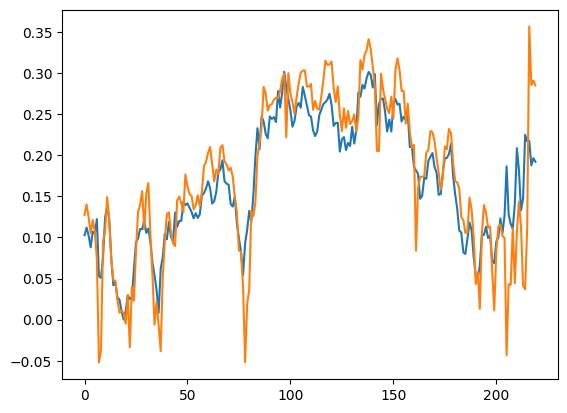

In [15]:
predictions = model.predict(x_test)

plt.plot(y_test)
plt.plot(predictions)
plt.show()